In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

pd.set_option("display.max_columns", 999)
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
!! pwd

['/Users/tiko/Documents/Iowa_Liquor_Sales_Analysis/Tigran_V']

In [4]:
!! ls

['Exploratory_Analysis.ipynb', 'bigQuery.py', 'requirements.txt']

In [5]:
!! cd /..

[]

In [6]:
!! ls


['Exploratory_Analysis.ipynb', 'bigQuery.py', 'requirements.txt']

## Exploring Smaller Dataset For Products (More Than 10,000 observations)

In [7]:
vendors_DF = pd.read_csv("../Iowa_Liquor_Products.csv")

In [8]:
vendors_DF.head()

,Item Number,Category Name,Item Description,Vendor,Vendor Name,Bottle Volume (ml),Pack,Inner Pack,Age,Proof,List Date,UPC,SCC,State Bottle Cost,State Case Cost,State Bottle Retail,Report Date
0,901141,Special Order Items,Libertine Absinthe(French Absinthe) Mini,885,YAHARA BAY DISTILLERS INC,50,6,1,0,114,04/20/2012,NaN,10892060104050,4.82,28.90,7.23,03/01/2022
1,65017,Imported Cordials & Liqueurs,Galliano Liqueur,305,Mhw LTD,375,12,1,0,84,10/01/2012,8.091511e+10,10892060104050,10.75,129.00,16.13,03/01/2022
2,88152,100% Agave Tequila,Sauza 901 Silver,65,Jim Beam Brands,750,6,1,0,80,06/01/2014,8.068684e+10,10892060104050,13.12,78.72,19.68,03/01/2022
3,903796,Special Order Items,Bacardi Anejo DISCO,35,BACARDI USA INC,750,12,1,0,80,09/01/1990,8.068684e+10,80480004347,7.75,93.00,11.63,03/01/2022
4,905846,Scotch Whiskies,Ron Burgundy,305,Mhw LTD,750,12,1,0,80,10/01/2014,8.068684e+10,10626990143885,14.61,175.25,21.92,03/01/2022


In [9]:
vendors_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10443 entries, 0 to 10442
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item Number          10443 non-null  object 
 1   Category Name        10443 non-null  object 
 2   Item Description     10443 non-null  object 
 3   Vendor               10443 non-null  int64  
 4   Vendor Name          10443 non-null  object 
 5   Bottle Volume (ml)   10443 non-null  int64  
 6   Pack                 10443 non-null  int64  
 7   Inner Pack           10443 non-null  int64  
 8   Age                  10443 non-null  int64  
 9   Proof                10443 non-null  int64  
 10  List Date            10443 non-null  object 
 11  UPC                  10442 non-null  float64
 12  SCC                  10443 non-null  int64  
 13  State Bottle Cost    10443 non-null  float64
 14  State Case Cost      10443 non-null  float64
 15  State Bottle Retail  10443 non-null 

In [10]:
vendors_DF.describe()

,Vendor,Bottle Volume (ml),Pack,Inner Pack,Age,Proof,UPC,SCC,State Bottle Cost,State Case Cost,State Bottle Retail
count,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000,1.044200e+04,1.044300e+04,10443.000000,10443.000000,10443.000000
mean,351.518721,759.155319,9.127741,2.645121,1.091928,74.703342,2.940125e+11,1.442474e+13,31.318133,160.423437,46.992494
std,204.096717,401.309784,6.097352,11.090281,20.036626,21.466024,3.404588e+11,1.199934e+13,201.091529,376.650150,301.637260
min,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.330000,1.980000,0.500000
25%,255.000000,750.000000,6.000000,1.000000,0.000000,70.000000,8.175383e+10,1.008309e+13,7.950000,72.000000,11.930000
50%,363.000000,750.000000,6.000000,1.000000,0.000000,80.000000,8.764711e+10,1.089206e+13,13.500000,108.000000,20.250000
75%,421.000000,750.000000,12.000000,1.000000,0.000000,86.000000,7.210590e+11,1.750301e+13,24.000000,164.940000,36.000000
max,978.000000,5250.000000,120.000000,240.000000,2002.000000,190.000000,8.328890e+12,9.320255e+13,7680.000000,19057.680000,11520.000000


In [11]:
vendors_DF.columns = vendors_DF.columns.str.replace(" ","") #Making column names more readable for pandas

In [12]:
vendors_DF.head()

,ItemNumber,CategoryName,ItemDescription,Vendor,VendorName,BottleVolume(ml),Pack,InnerPack,Age,Proof,ListDate,UPC,SCC,StateBottleCost,StateCaseCost,StateBottleRetail,ReportDate
0,901141,Special Order Items,Libertine Absinthe(French Absinthe) Mini,885,YAHARA BAY DISTILLERS INC,50,6,1,0,114,04/20/2012,NaN,10892060104050,4.82,28.90,7.23,03/01/2022
1,65017,Imported Cordials & Liqueurs,Galliano Liqueur,305,Mhw LTD,375,12,1,0,84,10/01/2012,8.091511e+10,10892060104050,10.75,129.00,16.13,03/01/2022
2,88152,100% Agave Tequila,Sauza 901 Silver,65,Jim Beam Brands,750,6,1,0,80,06/01/2014,8.068684e+10,10892060104050,13.12,78.72,19.68,03/01/2022
3,903796,Special Order Items,Bacardi Anejo DISCO,35,BACARDI USA INC,750,12,1,0,80,09/01/1990,8.068684e+10,80480004347,7.75,93.00,11.63,03/01/2022
4,905846,Scotch Whiskies,Ron Burgundy,305,Mhw LTD,750,12,1,0,80,10/01/2014,8.068684e+10,10626990143885,14.61,175.25,21.92,03/01/2022


### Variable Data Types and Data Description:

<p> This dataset provides a list of liquor products maintained by the Iowa Alcoholic Beverages Division. 
Data is updated monthly. Updates are typically <a href = "https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Products/gckp-fe7r"> available </a> first of the month.</p>



 
 
 <b>- Numeric:</b>
 
   - <i> Vendor </i>
   - <i> BottleVolume(ml) </i>
   - <i> Pack </i>
   - <i> InnerPack </i>
   - <i> Age </i>
   - <i> Proof </i>
   - <i> UPC </i>
   - <i> SCC </i>
   - <i> InnerPack </i>
   - <i> StateBottleCost </i>
   - <i> StateBottleRetail </i>
   - <i> ReportDate </i>
   
 <b>- Object:</b> 
 
   - <i> ItemNumber </i>
   - <i> CategoryName </i>
   - <i> ItemDescription </i>
   - <i> VendorName </i>

 <b>- DateTime Object:</b>
   - <i> ListDate </i>
   - <i> ReportDate </i>

## Exploring Main Dataset (More than 23MM Observations)

#### Using BigQuery Dataset 

In [13]:
import pyarrow #to convert sql query to pandas DF without the need of iterative functions
from dataclasses import dataclass
from google.cloud import bigquery
import os
import pandas as pd
pd.set_option("display.max_columns",999)

In [286]:

path = '/Users/tiko/Downloads/BQ_cred.json'


os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path

project = 'liquor-store-analysis'
dataset = 'liquor-store-analysis'

client = bigquery.Client(project=project)
df_sql = client.dataset(dataset)

qr = client.query("""

SELECT * FROM 
`liquor-store-analysis.Liquor_Dataset.TABLE1`
WHERE date >= '2020-03-01'AND date <='2021-02-28'
ORDER BY date
LIMIT 250000;
""")

results = qr.result()


# name_group_query = """
# SELECT * FROM `bigquery-public-data.iowa_liquor_sales.sales` 
# LIMIT 20 OFFSET 2;
# """

# client.query(name_group_query)

In [287]:
stores_DF = results.to_dataframe()

In [288]:
stores_DF.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-25571300005,2020-03-02,4025,Karam Kaur Khasriya Llc,702 13th St,Belle Plaine,52208.0,POINT (-92.277759 41.897052),6,BENTON,1701100.0,Temporary & Specialty Packages,260,DIAGEO AMERICAS,72911,Captain Morgan Orange Vanilla Twist,12,750,9.06,13.59,2,27.18,1.5,0.39
1,INV-25562000026,2020-03-02,5682,Ambysure Inc / Clinton,1641 S Bluff Blvd,Clinton,52732.0,POINT (-90.225022 41.833351),23,CLINTON,1081600.0,Whiskey Liqueur,421,SAZERAC COMPANY INC,86885,Southern Comfort PET,12,750,10.33,15.50,12,186.00,9.0,2.37
2,INV-25566200019,2020-03-02,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,395,PROXIMO,15777,Bushmills Irish Whiskey,12,1000,17.25,25.88,6,155.28,6.0,1.58
3,INV-25574100031,2020-03-02,2662,Hy-Vee Wine & Spirits / Muscatine,"522 Mulberry, Suite A",Muscatine,52761.0,POINT (-91.04437 41.426615),70,MUSCATINE,1011200.0,Straight Bourbon Whiskies,65,Jim Beam Brands,27783,Jim Beam Apple,12,750,10.50,15.75,12,189.00,9.0,2.37
4,INV-25546200042,2020-03-02,4829,Central City 2,1501 Michigan Ave,Des Moines,50314.0,POINT (-93.613739 41.60572),77,POLK,1031200.0,American Flavored Vodka,380,Phillips Beverage,41604,UV Grape,12,750,6.50,9.75,36,351.00,27.0,7.13


In [289]:
stores_DF.store_number.value_counts()

2190    1638
2572    1413
2614    1405
2647    1370
2619    1327
        ... 
9037       3
5223       3
2686       2
3826       1
9010       1
Name: store_number, Length: 1588, dtype: int64

In [290]:
import re

In [291]:
stores_DF.store_location = stores_DF.store_location.str.replace('POINT','').str.replace('(','').str.replace(')','').str.lstrip()

/var/folders/r1/cq24m6mn5j1c896ftltp3tjw0000gn/T/ipykernel_74961/2258163405.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stores_DF.store_location = stores_DF.store_location.str.replace('POINT','').str.replace('(','').str.replace(')','').str.lstrip()


In [292]:
stores_DF.store_name.value_counts().sum()

250000

In [134]:
stores_DF[stores_DF.store_location.str.contains('Hy-Vee')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [293]:
pd.DataFrame(stores_DF.store_location.str.split(' '))['store_location'][0][0]

'-92.277759'

In [294]:
stores_DF['long'] = stores_DF.store_location.str.split(' ', expand=True)[0]

In [295]:
stores_DF['lat'] = stores_DF.store_location.str.split(' ', expand=True)[1]

In [296]:
stores_DF.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,long,lat
0,INV-25571300005,2020-03-02,4025,Karam Kaur Khasriya Llc,702 13th St,Belle Plaine,52208.0,-92.277759 41.897052,6,BENTON,1701100.0,Temporary & Specialty Packages,260,DIAGEO AMERICAS,72911,Captain Morgan Orange Vanilla Twist,12,750,9.06,13.59,2,27.18,1.5,0.39,-92.277759,41.897052
1,INV-25562000026,2020-03-02,5682,Ambysure Inc / Clinton,1641 S Bluff Blvd,Clinton,52732.0,-90.225022 41.833351,23,CLINTON,1081600.0,Whiskey Liqueur,421,SAZERAC COMPANY INC,86885,Southern Comfort PET,12,750,10.33,15.50,12,186.00,9.0,2.37,-90.225022,41.833351
2,INV-25566200019,2020-03-02,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,395,PROXIMO,15777,Bushmills Irish Whiskey,12,1000,17.25,25.88,6,155.28,6.0,1.58,None,None
3,INV-25574100031,2020-03-02,2662,Hy-Vee Wine & Spirits / Muscatine,"522 Mulberry, Suite A",Muscatine,52761.0,-91.04437 41.426615,70,MUSCATINE,1011200.0,Straight Bourbon Whiskies,65,Jim Beam Brands,27783,Jim Beam Apple,12,750,10.50,15.75,12,189.00,9.0,2.37,-91.04437,41.426615
4,INV-25546200042,2020-03-02,4829,Central City 2,1501 Michigan Ave,Des Moines,50314.0,-93.613739 41.60572,77,POLK,1031200.0,American Flavored Vodka,380,Phillips Beverage,41604,UV Grape,12,750,6.50,9.75,36,351.00,27.0,7.13,-93.613739,41.60572


In [60]:
stores_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  250000 non-null  object 
 1   date                     250000 non-null  object 
 2   store_number             250000 non-null  object 
 3   store_name               250000 non-null  object 
 4   address                  249811 non-null  object 
 5   city                     249811 non-null  object 
 6   zip_code                 249811 non-null  object 
 7   store_location           224919 non-null  object 
 8   county_number            249811 non-null  object 
 9   county                   249811 non-null  object 
 10  category                 249873 non-null  object 
 11  category_name            249873 non-null  object 
 12  vendor_number            250000 non-null  object 
 13  vendor_name              250000 non-null  object 
 14  item

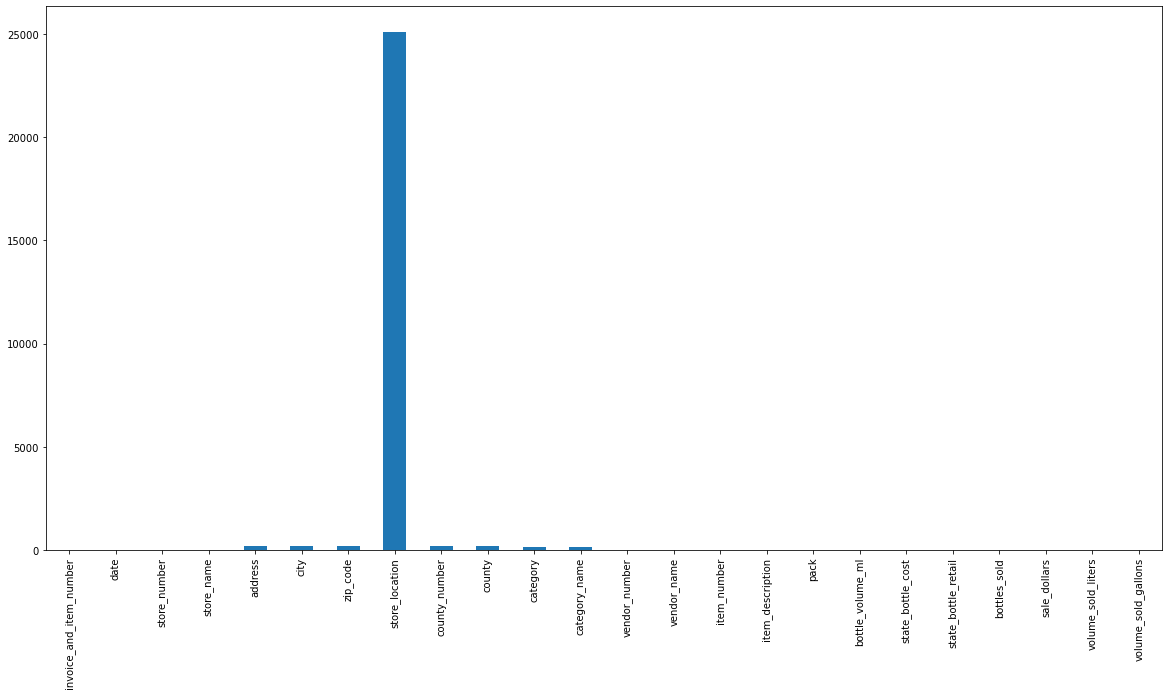

In [61]:
stores_DF.isna().sum().plot.bar();  # How many na values we have 

In [80]:
stores_DF.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  250000 non-null  object 
 1   date                     250000 non-null  object 
 2   store_number             250000 non-null  object 
 3   store_name               250000 non-null  object 
 4   address                  249985 non-null  object 
 5   city                     249985 non-null  object 
 6   zip_code                 249985 non-null  object 
 7   store_location           227052 non-null  object 
 8   county_number            249985 non-null  object 
 9   county                   249985 non-null  object 
 10  category                 249979 non-null  object 
 11  category_name            249979 non-null  object 
 12  vendor_number            249999 non-null  object 
 13  vendor_name              249999 non-null  object 
 14  item

In [28]:
from datetime import datetime

In [297]:
stores_DF.date = pd.to_datetime(stores_DF.date)

0         3
1         3
2         3
3         3
4         3
         ..
249995    4
249996    4
249997    4
249998    4
249999    4
Name: date, Length: 250000, dtype: int64

In [298]:
stores_DF.info('deep') 
# memory usage: 45.8+ MB --> Since we have a large dataset (7Gib on BigQuery)
# We can downcast some of the numerical datatypes in the dataset to minimize memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   invoice_and_item_number  250000 non-null  object        
 1   date                     250000 non-null  datetime64[ns]
 2   store_number             250000 non-null  object        
 3   store_name               250000 non-null  object        
 4   address                  249931 non-null  object        
 5   city                     249931 non-null  object        
 6   zip_code                 249931 non-null  object        
 7   store_location           227199 non-null  object        
 8   county_number            249931 non-null  object        
 9   county                   249931 non-null  object        
 10  category                 249884 non-null  object        
 11  category_name            249884 non-null  object        
 12  vendor_number   

In [425]:
sale_per_day['Day'] = sale_per_day.date.dt.day
sale_per_day['Month'] = sale_per_day.date.dt.month
sale_per_day['Year'] = sale_per_day.date.dt.year

In [427]:
sale_per_day = stores_DF.groupby(['Month'])[['sale_dollars']].sum().reset_index()

KeyError: 'Month'

In [426]:
sale_per_day

,date,sale_dollars,Day,Month,Year
0,2020-03-02,1394930.88,2,3,2020
1,2020-03-03,1391347.37,3,3,2020
2,2020-03-04,1467577.96,4,3,2020
3,2020-03-05,1142718.21,5,3,2020
4,2020-03-06,1372356.45,6,3,2020
5,2020-03-09,1598025.71,9,3,2020
6,2020-03-10,1542714.42,10,3,2020
7,2020-03-11,1523485.99,11,3,2020
8,2020-03-12,1121808.74,12,3,2020
9,2020-03-13,1348036.67,13,3,2020


<AxesSubplot:xlabel='date', ylabel='sale_dollars'>

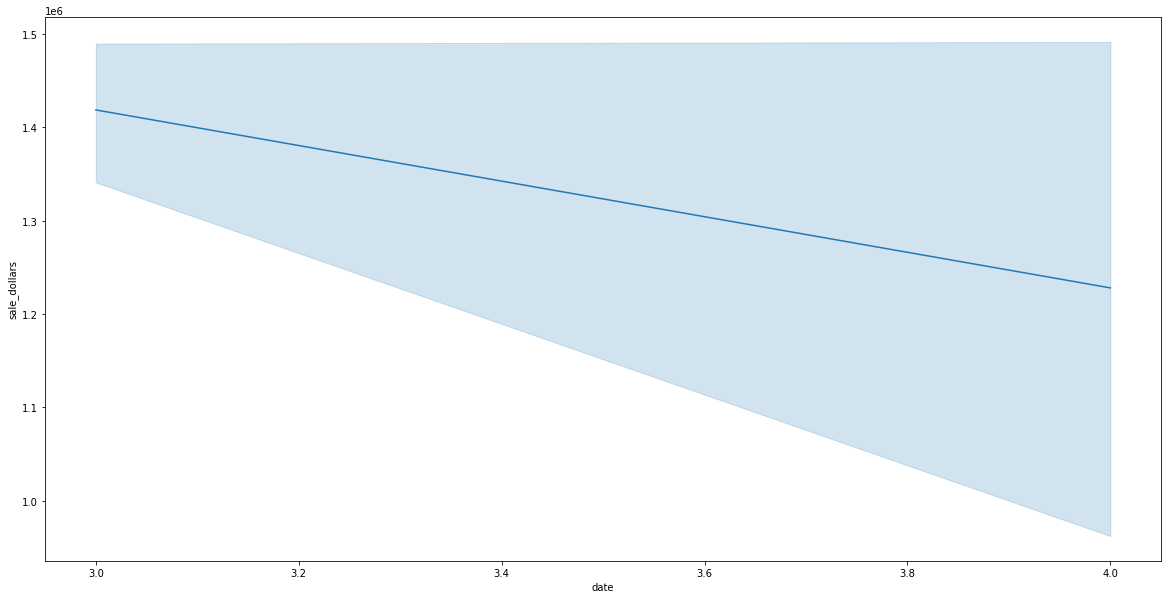

In [423]:
sns.lineplot(x = sale_per_day.date.dt.month, y = sale_per_day.sale_dollars)

In [299]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

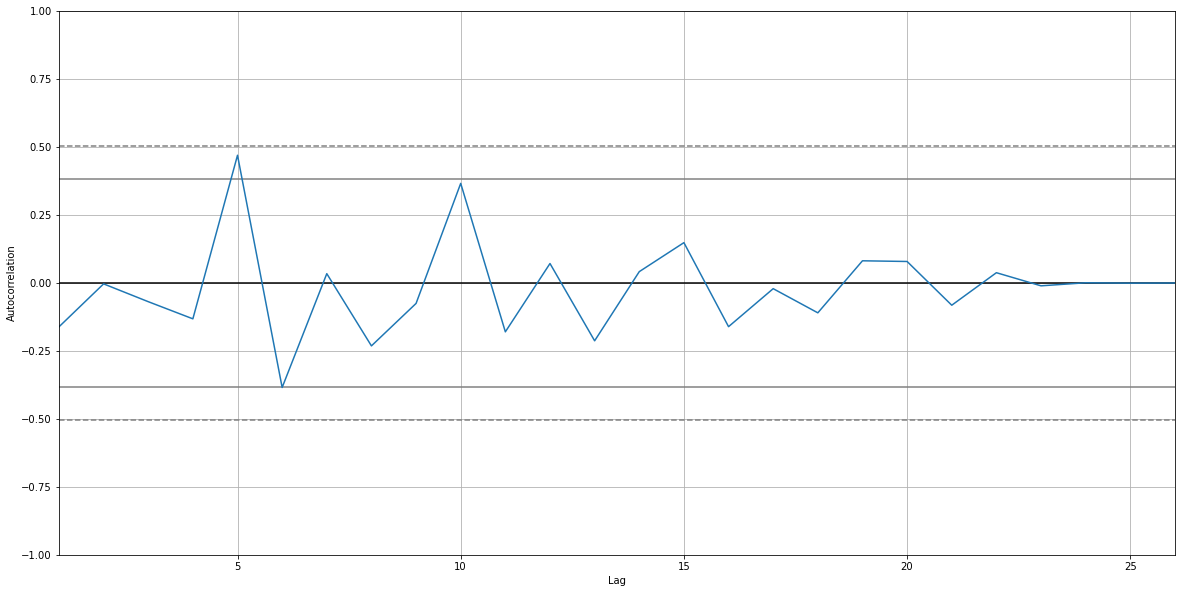

In [62]:
autocorrelation_plot(sale_per_day.set_index('date'))

In [ ]:
float_cols = df.select_dtypes('float').columns
integer_cols = df.select_dtypes('integer').columns

df[float_cols] = df[fcols].apply(pd.to_numeric, downcast='float')
df[integer_cols] = df[icols].apply(pd.to_numeric, downcast='integer')

In [164]:
gg =stores_DF.groupby(['store_number','store_name']).size().reset_index()

,store_number,store_name,0
15,2500,Hy-Vee Food Store #1 / Ames,868
16,2501,Hy-Vee #2 / Ames,879
17,2502,Hy-Vee Wine and Spirits / Ankeny,1109
18,2505,Hy-Vee Wine and Spirits / Boone,510
19,2506,Hy-Vee #1044 / Burlington,936
...,...,...,...
163,2700,Hy-Vee Dollar Fresh - Emmetsburg,118
164,2702,Hy-Vee Gas #1 / Ankeny,28
165,2703,Hy-Vee Fast and Fresh / Clive,58
167,2707,Hy-Vee Fast and Fresh - Urbandale,68


In [168]:
gg.rename(columns=
         {0: 'Count'},inplace=True)

In [172]:
gg.sort_values(by='Count', ascending=False).head(30)

,store_number,store_name,Count
3,2190,"Central City Liquor, Inc.",1638
64,2572,Hy-Vee Food Store / Cedar Falls,1413
95,2614,Hy-Vee #3 Food & Drugstore / Davenport,1405
118,2647,Hy-Vee #7 / Cedar Rapids,1370
98,2619,Hy-Vee Wine and Spirits / WDM,1327
119,2648,Hy-Vee #4 / WDM,1277
86,2603,Hy-Vee Wine and Spirits / Bettendorf,1272
134,2666,Hy-Vee Food Store #2 / State Ankeny,1272
48,2552,Hy-Vee Food Store #3 / Cedar Rapids,1255
65,2573,Hy-Vee Food Store / Muscatine,1242


In [193]:
pd.DataFrame(gg[gg.store_name.str.contains('Hy-Vee')].sort_values(by='Count', ascending=False)['store_name'].value_counts())

,store_name
Hy-Vee Food Store / Cedar Falls,1
Hy-Vee Wine and Spirits / Humboldt,1
Hy-Vee Wine and Spirits / Denison,1
Hy-Vee Ottumwa#2,1
Hy-Vee Drugstore #4 / Cedar Rapids,1
...,...
Hy-Vee Food Store #2 / Iowa City,1
Hy-Vee Food Store / Marshalltown,1
Hy-Vee #4 / Davenport,1
Hy-Vee Food Store / Iowa City,1


In [ ]:
# globals.clear()

In [79]:
stores_DF[stores_DF.store_name.str.contains('Hy')].shape #74,623 observations for Hy-Vee stores

(74623, 24)

In [195]:
stores_DF.drop('store_location', axis = 1, inplace = True)

In [196]:
stores_DF.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,long,lat
0,INV-25571300005,2020-03-02,4025,Karam Kaur Khasriya Llc,702 13th St,Belle Plaine,52208.0,6,BENTON,1701100.0,Temporary & Specialty Packages,260,DIAGEO AMERICAS,72911,Captain Morgan Orange Vanilla Twist,12,750,9.06,13.59,2,27.18,1.5,0.39,-92.277759,41.897052
1,INV-25562000026,2020-03-02,5682,Ambysure Inc / Clinton,1641 S Bluff Blvd,Clinton,52732.0,23,CLINTON,1081600.0,Whiskey Liqueur,421,SAZERAC COMPANY INC,86885,Southern Comfort PET,12,750,10.33,15.50,12,186.00,9.0,2.37,-90.225022,41.833351
2,INV-25566200019,2020-03-02,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,31,DUBUQUE,1012400.0,Irish Whiskies,395,PROXIMO,15777,Bushmills Irish Whiskey,12,1000,17.25,25.88,6,155.28,6.0,1.58,None,None
3,INV-25574100031,2020-03-02,2662,Hy-Vee Wine & Spirits / Muscatine,"522 Mulberry, Suite A",Muscatine,52761.0,70,MUSCATINE,1011200.0,Straight Bourbon Whiskies,65,Jim Beam Brands,27783,Jim Beam Apple,12,750,10.50,15.75,12,189.00,9.0,2.37,-91.04437,41.426615
4,INV-25546200042,2020-03-02,4829,Central City 2,1501 Michigan Ave,Des Moines,50314.0,77,POLK,1031200.0,American Flavored Vodka,380,Phillips Beverage,41604,UV Grape,12,750,6.50,9.75,36,351.00,27.0,7.13,-93.613739,41.60572


In [203]:
gg

,store_number,store_name,Count
0,2106,Hillstreet News and Tobacco,212
1,2130,Sycamore Convenience,218
2,2178,Double D Liquor Store,259
3,2190,"Central City Liquor, Inc.",1638
4,2191,Keokuk Spirits,459
...,...,...,...
1583,9031,Lonely Oak Distillery,6
1584,9037,"Green Frog Distillery, LLC",3
1585,9039,Foundry Distilling Company,7
1586,9041,S&B Farms Distillery,10


In [419]:
hyveeDF.isna().sum()

invoice_and_item_number        0
date                           0
store_number                   0
store_name                     0
address                        0
city                           0
zip_code                       0
store_location             10408
county_number                  0
county                         0
category                      33
category_name                 33
vendor_number                  0
vendor_name                    0
item_number                    0
item_description               0
pack                           0
bottle_volume_ml               0
state_bottle_cost              0
state_bottle_retail            0
bottles_sold                   0
sale_dollars                   0
volume_sold_liters             0
volume_sold_gallons            0
long                       10408
lat                        10408
StoreType                      0
dtype: int64

In [418]:
hyveeDF[hyveeDF['address'].isna()]

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,long,lat,StoreType


In [306]:
stores_DF.store_name = stores_DF.store_name.apply(str.lower)

In [332]:
hyveeDF = stores_DF[stores_DF.store_name.str.contains('hy-vee')]

In [333]:
hyveeDF

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,long,lat
2,INV-25566200019,2020-03-02,2524,hy-vee food store / dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,395,PROXIMO,15777,Bushmills Irish Whiskey,12,1000,17.25,25.88,6,155.28,6.00,1.58,None,None
3,INV-25574100031,2020-03-02,2662,hy-vee wine & spirits / muscatine,"522 Mulberry, Suite A",Muscatine,52761.0,-91.04437 41.426615,70,MUSCATINE,1011200.0,Straight Bourbon Whiskies,65,Jim Beam Brands,27783,Jim Beam Apple,12,750,10.50,15.75,12,189.00,9.00,2.37,-91.04437,41.426615
11,INV-25558700086,2020-03-02,2539,hy-vee food store / iowa falls,640 S. Oak,Iowa Falls,50126.0,-93.262364 42.508752,42,HARDIN,1012400.0,Irish Whiskies,395,PROXIMO,15830,Proper No. Twelve,12,750,14.00,21.00,1,21.00,0.75,0.19,-93.262364,42.508752
13,INV-25566100001,2020-03-02,2524,hy-vee food store / dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,370,PERNOD RICARD USA,15856,Redbreast 12YR,6,750,33.48,50.22,12,602.64,9.00,2.37,None,None
14,INV-25570000122,2020-03-02,2508,hy-vee food store #1 / cedar rapids,"1843 Johnson Avenue, N.W.",Cedar Rapids,52405.0,-91.697941 41.97447,57,LINN,1012100.0,Canadian Whiskies,260,DIAGEO AMERICAS,10803,Crown Royal Regal Apple Mini,10,50,7.35,11.03,1,11.03,0.05,0.01,-91.697941,41.97447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249987,INV-26325000006,2020-04-06,2567,hy-vee drugstore / davenport,2200 West Kimberly,Davenport,52806.0,-90.608201 41.560663,82,SCOTT,1062400.0,Spiced Rum,260,DIAGEO AMERICAS,43285,Captain Morgan Original Spiced PET,12,750,9.06,13.59,12,163.08,9.00,2.37,-90.608201,41.560663
249991,INV-26316700001,2020-04-06,2509,hy-vee / drugtown #1 / cedar rapids,1520 6th St SW,Cedar Rapids,52404.0,-91.67706 41.962419,57,LINN,1062400.0,Spiced Rum,260,DIAGEO AMERICAS,1799,Captain Morgan Original Spiced Barrel,6,1750,18.00,27.00,240,6480.00,420.00,110.95,-91.67706,41.962419
249995,INV-26324800220,2020-04-06,2614,hy-vee #3 food & drugstore / davenport,1823 E Kimberly Rd,Davenport,52807.0,-90.548919 41.55678100000001,82,SCOTT,1062300.0,Aged Dark Rum,35,BACARDI USA INC,43109,Bacardi Black,12,750,8.25,12.38,12,148.56,9.00,2.37,-90.548919,41.55678100000001
249997,INV-26319400086,2020-04-06,2619,hy-vee wine and spirits / wdm,1725 74th St,West Des Moines,50266.0,-93.808855 41.598515,77,POLK,1082000.0,Imported Cordials & Liqueurs,192,"Mast-Jagermeister US, Inc",65251,Jagermeister Liqueur Mini,5,50,29.53,44.30,1,44.30,0.05,0.01,-93.808855,41.598515


In [395]:
def what_type(row):
    if row.Name[-4:].find('H') > 0:
        return 'HZ'
    elif row.WELLTYPE.find('Horizontal') > 0:
        return 'HZ'
    elif row.WELLTYPE.find('Deviated') > 0:
        return 'D'
    elif row.WELLTYPE.find('Multilateral') > 0:
        return 'ML'
    else:
        return 'V'

df['want'] = df.apply(criteria, axis=1)



Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station
Gas Station


In [384]:
hyveeDF

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,long,lat,StoreType
2,INV-25566200019,2020-03-02,2524,hy-vee food store / dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,395,PROXIMO,15777,Bushmills Irish Whiskey,12,1000,17.25,25.88,6,155.28,6.00,1.58,None,None,C-Store
3,INV-25574100031,2020-03-02,2662,hy-vee wine & spirits / muscatine,"522 Mulberry, Suite A",Muscatine,52761.0,-91.04437 41.426615,70,MUSCATINE,1011200.0,Straight Bourbon Whiskies,65,Jim Beam Brands,27783,Jim Beam Apple,12,750,10.50,15.75,12,189.00,9.00,2.37,-91.04437,41.426615,C-Store
11,INV-25558700086,2020-03-02,2539,hy-vee food store / iowa falls,640 S. Oak,Iowa Falls,50126.0,-93.262364 42.508752,42,HARDIN,1012400.0,Irish Whiskies,395,PROXIMO,15830,Proper No. Twelve,12,750,14.00,21.00,1,21.00,0.75,0.19,-93.262364,42.508752,C-Store
13,INV-25566100001,2020-03-02,2524,hy-vee food store / dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,370,PERNOD RICARD USA,15856,Redbreast 12YR,6,750,33.48,50.22,12,602.64,9.00,2.37,None,None,C-Store
14,INV-25570000122,2020-03-02,2508,hy-vee food store #1 / cedar rapids,"1843 Johnson Avenue, N.W.",Cedar Rapids,52405.0,-91.697941 41.97447,57,LINN,1012100.0,Canadian Whiskies,260,DIAGEO AMERICAS,10803,Crown Royal Regal Apple Mini,10,50,7.35,11.03,1,11.03,0.05,0.01,-91.697941,41.97447,C-Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249987,INV-26325000006,2020-04-06,2567,hy-vee drugstore / davenport,2200 West Kimberly,Davenport,52806.0,-90.608201 41.560663,82,SCOTT,1062400.0,Spiced Rum,260,DIAGEO AMERICAS,43285,Captain Morgan Original Spiced PET,12,750,9.06,13.59,12,163.08,9.00,2.37,-90.608201,41.560663,C-Store
249991,INV-26316700001,2020-04-06,2509,hy-vee / drugtown #1 / cedar rapids,1520 6th St SW,Cedar Rapids,52404.0,-91.67706 41.962419,57,LINN,1062400.0,Spiced Rum,260,DIAGEO AMERICAS,1799,Captain Morgan Original Spiced Barrel,6,1750,18.00,27.00,240,6480.00,420.00,110.95,-91.67706,41.962419,C-Store
249995,INV-26324800220,2020-04-06,2614,hy-vee #3 food & drugstore / davenport,1823 E Kimberly Rd,Davenport,52807.0,-90.548919 41.55678100000001,82,SCOTT,1062300.0,Aged Dark Rum,35,BACARDI USA INC,43109,Bacardi Black,12,750,8.25,12.38,12,148.56,9.00,2.37,-90.548919,41.55678100000001,C-Store
249997,INV-26319400086,2020-04-06,2619,hy-vee wine and spirits / wdm,1725 74th St,West Des Moines,50266.0,-93.808855 41.598515,77,POLK,1082000.0,Imported Cordials & Liqueurs,192,"Mast-Jagermeister US, Inc",65251,Jagermeister Liqueur Mini,5,50,29.53,44.30,1,44.30,0.05,0.01,-93.808855,41.598515,C-Store


In [378]:
hyveeDF['StoreType'] = hyveeDF.apply(typeofstore, axis=1)

KeyboardInterrupt: 

In [397]:
hyveeDF

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,long,lat,StoreType
2,INV-25566200019,2020-03-02,2524,hy-vee food store / dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,395,PROXIMO,15777,Bushmills Irish Whiskey,12,1000,17.25,25.88,6,155.28,6.00,1.58,None,None,C-Store
3,INV-25574100031,2020-03-02,2662,hy-vee wine & spirits / muscatine,"522 Mulberry, Suite A",Muscatine,52761.0,-91.04437 41.426615,70,MUSCATINE,1011200.0,Straight Bourbon Whiskies,65,Jim Beam Brands,27783,Jim Beam Apple,12,750,10.50,15.75,12,189.00,9.00,2.37,-91.04437,41.426615,C-Store
11,INV-25558700086,2020-03-02,2539,hy-vee food store / iowa falls,640 S. Oak,Iowa Falls,50126.0,-93.262364 42.508752,42,HARDIN,1012400.0,Irish Whiskies,395,PROXIMO,15830,Proper No. Twelve,12,750,14.00,21.00,1,21.00,0.75,0.19,-93.262364,42.508752,C-Store
13,INV-25566100001,2020-03-02,2524,hy-vee food store / dubuque,3500 Dodge St,Dubuque,52001.0,None,31,DUBUQUE,1012400.0,Irish Whiskies,370,PERNOD RICARD USA,15856,Redbreast 12YR,6,750,33.48,50.22,12,602.64,9.00,2.37,None,None,C-Store
14,INV-25570000122,2020-03-02,2508,hy-vee food store #1 / cedar rapids,"1843 Johnson Avenue, N.W.",Cedar Rapids,52405.0,-91.697941 41.97447,57,LINN,1012100.0,Canadian Whiskies,260,DIAGEO AMERICAS,10803,Crown Royal Regal Apple Mini,10,50,7.35,11.03,1,11.03,0.05,0.01,-91.697941,41.97447,C-Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249987,INV-26325000006,2020-04-06,2567,hy-vee drugstore / davenport,2200 West Kimberly,Davenport,52806.0,-90.608201 41.560663,82,SCOTT,1062400.0,Spiced Rum,260,DIAGEO AMERICAS,43285,Captain Morgan Original Spiced PET,12,750,9.06,13.59,12,163.08,9.00,2.37,-90.608201,41.560663,C-Store
249991,INV-26316700001,2020-04-06,2509,hy-vee / drugtown #1 / cedar rapids,1520 6th St SW,Cedar Rapids,52404.0,-91.67706 41.962419,57,LINN,1062400.0,Spiced Rum,260,DIAGEO AMERICAS,1799,Captain Morgan Original Spiced Barrel,6,1750,18.00,27.00,240,6480.00,420.00,110.95,-91.67706,41.962419,C-Store
249995,INV-26324800220,2020-04-06,2614,hy-vee #3 food & drugstore / davenport,1823 E Kimberly Rd,Davenport,52807.0,-90.548919 41.55678100000001,82,SCOTT,1062300.0,Aged Dark Rum,35,BACARDI USA INC,43109,Bacardi Black,12,750,8.25,12.38,12,148.56,9.00,2.37,-90.548919,41.55678100000001,C-Store
249997,INV-26319400086,2020-04-06,2619,hy-vee wine and spirits / wdm,1725 74th St,West Des Moines,50266.0,-93.808855 41.598515,77,POLK,1082000.0,Imported Cordials & Liqueurs,192,"Mast-Jagermeister US, Inc",65251,Jagermeister Liqueur Mini,5,50,29.53,44.30,1,44.30,0.05,0.01,-93.808855,41.598515,C-Store


In [399]:
hyveeDF.date.dt.day_name().value_counts()

Monday       20533
Wednesday    18358
Friday       15705
Tuesday      14918
Thursday     10265
Name: date, dtype: int64

In [396]:
for i in hyveeDF['store_name']:
    if 'spirits' in i:
        return 'Wine & Spirits'
    if 'gas' in i:
        return 'Gas Station'
    if 'drug' in i:
        return 'Drug Store'
    if 
        

hy-vee wine & spirits / muscatine
hy-vee wine and spirits / wdm
hy-vee wine and spirits / wdm
hy-vee wine and spirits / wdm
hy-vee wine and spirits / wdm
hy-vee wine & spirits / muscatine
hy-vee wine and spirits / wdm
hy-vee wine and spirits / wdm
hy-vee wine & spirits / muscatine
hy-vee wine and spirits / wdm
hy-vee wine and spirits / storm lake
hy-vee wine and spirits / storm lake
hy-vee wine and spirits / storm lake
hy-vee wine and spirits / wdm
hy-vee wine & spirits / muscatine
hy-vee wine & spirits / muscatine
hy-vee wine and spirits / wdm
hy-vee wine and spirits / storm lake
hy-vee wine and spirits / iowa city
hy-vee wine and spirits / iowa city
hy-vee wine and spirits / wdm
hy-vee wine & spirits / muscatine
hy-vee wine and spirits / wdm
hy-vee wine and spirits / storm lake
hy-vee wine and spirits / iowa city
hy-vee wine and spirits / iowa city
hy-vee wine and spirits / wdm
hy-vee wine & spirits / muscatine
hy-vee wine and spirits / iowa city
hy-vee wine and spirits / storm lake


hy-vee wine and spirits / atlantic
hy-vee wine and spirits / atlantic
hy-vee wine and spirits / bettendorf
hy-vee wine & spirits #1 / mlk
hy-vee wine and spirits / shenandoah
hy-vee wine and spirits / boone
hy-vee wine and spirits / shenandoah
hy-vee wine and spirits / shenandoah
hy-vee fort dodge wine and spirits
hy-vee fort dodge wine and spirits
hy-vee wine and spirits / shenandoah
hy-vee wine & spirits #1 / mlk
hy-vee wine & spirits #1 / mlk
hy-vee wine & spirits #1 / mlk
hy-vee wine & spirits #1 / mlk
hy-vee wine and spirits / boone
hy-vee wine and spirits / boone
hy-vee wine and spirits / boone
hy-vee fort dodge wine and spirits
hy-vee fort dodge wine and spirits
hy-vee fort dodge wine and spirits
hy-vee fort dodge wine and spirits
hy-vee fort dodge wine and spirits
hy-vee fort dodge wine and spirits
hy-vee wine and spirits / atlantic
hy-vee wine & spirits #1 / mlk
hy-vee wine and spirits / atlantic
hy-vee wine and spirits / atlantic
hy-vee wine and spirits / shenandoah
hy-vee wi

hy-vee fort dodge wine and spirits
hy-vee wine and spirits / humboldt
hy-vee wine and spirits / bettendorf
hy-vee wine and spirits / boone
hy-vee wine and spirits / boone
hy-vee fort dodge wine and spirits
hy-vee wine and spirits / red oak
hy-vee wine and spirits / red oak
hy-vee wine and spirits / bettendorf
hy-vee wine and spirits / bettendorf
hy-vee wine and spirits / bettendorf
hy-vee wine and spirits / shenandoah
hy-vee wine and spirits / shenandoah
hy-vee wine and spirits / red oak
hy-vee wine and spirits / red oak
hy-vee wine and spirits / red oak
hy-vee wine and spirits / bettendorf
hy-vee fort dodge wine and spirits
hy-vee wine and spirits / shenandoah
hy-vee wine and spirits / bettendorf
hy-vee wine and spirits / boone
hy-vee fort dodge wine and spirits
hy-vee wine and spirits / humboldt
hy-vee wine and spirits / boone
hy-vee wine and spirits / boone
hy-vee wine and spirits / boone
hy-vee wine and spirits / red oak
hy-vee wine and spirits / atlantic
hy-vee wine and spirits / 

hy-vee wine and spirits / ankeny
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / estherville
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / washington
hy-vee wine and spirits / pella
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / estherville
hy-vee wine and spirits / washington
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / estherville
hy-vee wine and spirits / wdm
hy-vee wine and spirits / washington
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / spirit lake
hy-vee wine and spirits / wdm
hy-vee wine and spirits / algona
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / wdm
hy-vee wine and spirits / estherville
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / pella
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / spirit lake
hy-vee wine and spirits / estherville
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / ankeny
hy-vee wine and spir

hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / spirit lake
hy-vee wine and spirits / spirit lake
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / wdm
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / ankeny
hy-vee wine & spirits #2 / davenport
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / iowa city
hy-vee wine and spirits / estherville
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / ankeny
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / pella
hy-vee wine and spirits / ankeny
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / spirit lake
hy-vee wine and spirits / pella
hy-vee wine and spirits / spirit lake
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / wdm
hy-vee wine & spirits #2 / davenport
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / ankeny
hy-vee wine & spirits #2 / davenport
hy-vee wine 

hy-vee wine and spirits / wdm
hy-vee wine and spirits / wdm
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / pella
hy-vee wine and spirits / spirit lake
hy-vee wine and spirits / wdm
hy-vee wine and spirits / estherville
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / spirit lake
hy-vee wine and spirits / washington
hy-vee wine and spirits / spirit lake
hy-vee wine and spirits / washington
hy-vee wine and spirits / spirit lake
hy-vee wine and spirits / washington
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / pella
hy-vee wine and spirits / spirit lake
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / algona
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / estherville
hy-vee wine & spirits #2 / davenport
hy-vee wine and spirits / washington
hy-vee wine and spirits / wdm
hy-vee wine and spirits / wdm
hy-vee wine and spirits / estherville
hy-vee wine and spirits / ankeny
hy-vee wine and spirits / ankeny
hy-vee wine and spirits /

In [233]:
hyveeDF['store_name'].str.contains('gas')

2         False
3         False
11        False
13        False
14        False
          ...  
249987    False
249991    False
249995    False
249997    False
249998    False
Name: store_name, Length: 79779, dtype: bool

### Getting Coordinates for Columns Missing Location

 - Using <a href = "https://developer.mapquest.com/documentation/geocoding-api/address/get/'MapRequest">(Geocoding)</a>  and Json to parse the data


In [520]:
missing_loc_df = pd.DataFrame(hyveeDF[hyveeDF.store_location.isna()][['address', 'zip_code','city']]
                              .drop_duplicates())


missing_loc_df  
# to minimize api requests, we created a dataframe that only contains observations with missing 'location' info.




,address,zip_code,city
2,3500 Dodge St,52001.0,Dubuque
269,3221 SE 14th St,50315.0,Des Moines
9361,2126 Kimball Ave,50701.0,Waterloo
9409,812 S 1st Ave,52240.0,Iowa City
9448,1700 Valley West Dr,50265.0,West Des Moines
19987,3800 W Lincoln Way,50010.0,Ames
20000,Hwy 9 & 71,51360.0,Spirit Lake
20021,410 North Ankeny Blvd,50021.0,Ankeny
20042,7101 University Ave,50311.0,Windsor Heights
20095,3301 W Kimberly Rd,52804.0,Davenport


In [506]:
import json
import requests

# Necessary imports for parsing data and processing API requests.

In [524]:
#from something.py import key

# key = 'MUdpFyIkOFhHG97P0JwvoE6ZUtPCKeHb'

In [527]:
# def find_location(df):
    
#     '''
    
#     Finding location coordinates for all columns that are missing values for location.
    
#     df arguement that will be passed to the function is already the filtered dataframe
#     that contains the observations with null values to minimize amount of API requests.
    
#     '''

#     for i, j in df.iterrows():
#         location = str(df.at[i,'address']) + ',' + str(df.at[i,'zip_code']) + ',' + str(df.at[i,'city'])+', United States' 

#         params = {

#             "key": key,
#             "location": location
#         }


#         response = requests.get('http://www.mapquestapi.com/geocoding/v1/address', params=params)

        
#         data = json.loads(response.text)

#         lat = data['results'][0]['locations'][0]['latLng']['lat']
#         long = data['results'][0]['locations'][0]['latLng']['lng']

#         df.at[i,'long'] = long
#         df.at[i,'lat'] = lat
        
#     return df

# find_location(missing_loc_df)

,address,zip_code,city,long,lat
2,3500 Dodge St,52001.0,Dubuque,-90.680403,42.490953
269,3221 SE 14th St,50315.0,Des Moines,-93.596756,41.553941
9361,2126 Kimball Ave,50701.0,Waterloo,-92.356958,42.470376
9409,812 S 1st Ave,52240.0,Iowa City,-91.501984,41.650954
9448,1700 Valley West Dr,50265.0,West Des Moines,-93.753510,41.597680
19987,3800 W Lincoln Way,50010.0,Ames,-93.632141,42.022773
20000,Hwy 9 & 71,51360.0,Spirit Lake,-95.041038,43.430496
20021,410 North Ankeny Blvd,50021.0,Ankeny,-93.600406,41.734636
20042,7101 University Ave,50311.0,Windsor Heights,-93.715328,41.600375
20095,3301 W Kimberly Rd,52804.0,Davenport,-90.624806,41.558018
